# TRADING SYSTEM (MA crossover)

In [1]:
#getting data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

    
df = pd.read_excel('ethusd5min.xlsx')

In [2]:
df.head()

,Unnamed: 0,datetime,open,high,low,close,volume
0,0,2017-04-24 00:00:00,48.95,49.00,48.94,49.00,8570.1875
1,1,2017-04-24 00:05:00,49.00,49.15,49.00,49.15,14967.8750
2,2,2017-04-24 00:10:00,49.14,49.20,49.12,49.19,11749.8375
3,3,2017-04-24 00:15:00,49.19,49.22,49.16,49.19,8116.3500
4,4,2017-04-24 00:20:00,49.18,49.23,49.16,49.23,8364.0000


In [3]:
df.shape

(99627, 7)

In [4]:
df.datetime.min()

'2017-04-24 00:00:00'

In [5]:
df.datetime.max()

'2018-04-06 12:55:00'

In [6]:
df.dtypes

Unnamed: 0      int64
datetime       object
open          float64
high          float64
low           float64
close         float64
volume        float64
dtype: object

In [7]:
df.set_index('datetime',drop=True,inplace=True)
type(df.index)

pandas.core.indexes.base.Index

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
df.tail()

,Unnamed: 0,open,high,low,close,volume
datetime,,,,,,
2018-04-06 11:55:00,99622,368.54,368.65,368.54,368.65,8846.2800
2018-04-06 12:40:00,99623,368.00,368.00,367.25,367.77,9561.6300
2018-04-06 12:45:00,99624,367.77,368.11,366.47,367.13,41145.4400
2018-04-06 12:50:00,99625,367.07,367.88,366.47,367.51,39293.8775
2018-04-06 12:55:00,99626,367.52,367.99,367.52,367.66,2573.7075


In [11]:
df = df.drop(df.columns[0], axis=1)

In [12]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2017-04-24 00:00:00,48.95,49.00,48.94,49.00,8570.1875
2017-04-24 00:05:00,49.00,49.15,49.00,49.15,14967.8750
2017-04-24 00:10:00,49.14,49.20,49.12,49.19,11749.8375
2017-04-24 00:15:00,49.19,49.22,49.16,49.19,8116.3500
2017-04-24 00:20:00,49.18,49.23,49.16,49.23,8364.0000


In [13]:
df['close'].describe()

count    99627.000000
mean       453.780304
std        298.376829
min         49.000000
25%        266.800000
50%        322.230000
75%        689.185000
max       1419.900000
Name: close, dtype: float64

<AxesSubplot:xlabel='datetime'>

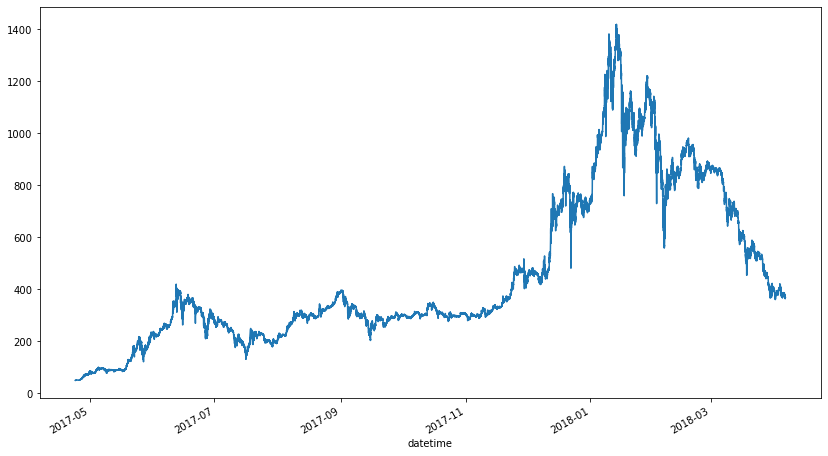

In [14]:
df['close'].plot(figsize=(14,8))

In [15]:
#resampling 
df = df.resample('1H').last()
df.dropna(inplace=True)

In [16]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2017-04-24 00:00:00,49.49,49.49,49.48,49.49,3464.125
2017-04-24 01:00:00,49.54,49.63,49.54,49.63,2925.515
2017-04-24 02:00:00,49.81,49.85,49.74,49.85,3686.125
2017-04-24 03:00:00,49.77,49.78,49.76,49.77,3334.590
2017-04-24 04:00:00,49.77,49.94,49.77,49.94,9771.580


## The Power of Rolling Window
* mean - media - df['close'].rolling(4).mean()
* min, max, std, sum:
    * df['close'].rolling(4).max()
    * df['close'].rolling(4).min()
    * df['close'].rolling(4).std()
    * df['close'].rolling(4).sum()
    
But, the real power of rolling is making your own lamba:
* In this we are doing the sum: df['close'].rolling(4).apply(lambda x: x[0]+x[1]+x[2]+x[3])
* In this house the average: df['close'].rolling(4).apply(lambda x: (x[0]+x[1]+x[2]+x[3])/4)
* In the latter something cool: df['close'].rolling(4).apply(lambda x: (x[0]-x[1]+x[2]*x[3]))

In [17]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2017-04-24 00:00:00,49.49,49.49,49.48,49.49,3464.125
2017-04-24 01:00:00,49.54,49.63,49.54,49.63,2925.515
2017-04-24 02:00:00,49.81,49.85,49.74,49.85,3686.125
2017-04-24 03:00:00,49.77,49.78,49.76,49.77,3334.590
2017-04-24 04:00:00,49.77,49.94,49.77,49.94,9771.580


In [18]:
#df['close'].rolling(4).mean()
#df['close'].rolling(4).max()
#df['close'].rolling(4).min()
#df['close'].rolling(4).std()
#df['close'].rolling(4).sum()
#df['close'].rolling(4).apply(lambda x: x[0]+x[1]+x[2]+x[3])
#df['close'].rolling(4).apply(lambda x: (x[0]+x[1]+x[2]+x[3])/4)
df['close'].rolling(4).apply(lambda x: ((x[0]*0.125+x[1]*0.25+x[2]*0.5+x[3]*1)/(0.125+0.25+0.5+1)))

datetime
2017-04-24 00:00:00           NaN
2017-04-24 01:00:00           NaN
2017-04-24 02:00:00           NaN
2017-04-24 03:00:00     49.754000
2017-04-24 04:00:00     49.862000
                          ...    
2018-04-06 08:00:00    370.080667
2018-04-06 09:00:00    370.082667
2018-04-06 10:00:00    366.541333
2018-04-06 11:00:00    367.590667
2018-04-06 12:00:00    367.537333
Name: close, Length: 8322, dtype: float64

In [19]:
#defining the length of the MA
fast_ma = 40
slow_ma = 120

df['slow_ma'] = df['close'].rolling(slow_ma).mean()
df['fast_ma'] = df['close'].rolling(fast_ma).mean()
df = df.dropna()
df.tail()

,open,high,low,close,volume,slow_ma,fast_ma
datetime,,,,,,,
2018-04-06 08:00:00,369.08,370.91,369.08,370.30,35135.0375,386.481250,377.96300
2018-04-06 09:00:00,370.69,370.69,370.34,370.52,17045.7600,386.385917,377.72600
2018-04-06 10:00:00,366.41,366.41,363.33,363.33,183894.4800,386.250167,377.32175
2018-04-06 11:00:00,368.54,368.65,368.54,368.65,8846.2800,386.191417,377.00975
2018-04-06 12:00:00,367.52,367.99,367.52,367.66,2573.7075,386.113500,376.67425


<AxesSubplot:xlabel='datetime'>

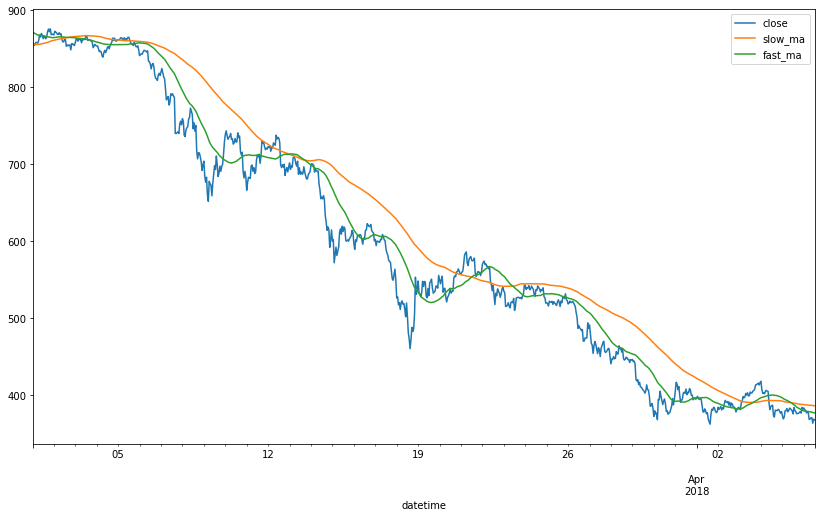

In [20]:
df.loc[df.index > datetime.datetime(2018,3,1)] \
    [['close','slow_ma','fast_ma']]. \
    plot(figsize=(14,8))

## BACKTESTING THE STRATEGY

In [21]:
#CREATING a position control
df['position'] = np.where(df['fast_ma']>df['slow_ma'],1,-1)

In [22]:
df.head()

,open,high,low,close,volume,slow_ma,fast_ma,position
datetime,,,,,,,,
2017-04-28 23:00:00,73.87,74.46,73.00,73.14,39532.5975,55.658583,64.60575,1
2017-04-29 00:00:00,73.85,74.15,73.51,74.08,18622.1700,55.863500,65.04175,1
2017-04-29 01:00:00,72.22,72.25,71.91,72.10,4615.6800,56.050750,65.38725,1
2017-04-29 02:00:00,70.86,70.91,70.70,70.87,7296.0050,56.225917,65.71750,1
2017-04-29 03:00:00,71.20,71.20,71.03,71.12,9959.2500,56.403833,66.01250,1


In [23]:
df['entry'] = np.where(df['position'].shift(1)!=df['position'],np.where(df['position'].shift(1)==-1,1,-1),0)


In [24]:
df.tail(100).head(50)

,open,high,low,close,volume,slow_ma,fast_ma,position,entry
datetime,,,,,,,,,
2018-04-02 09:00:00,391.00,391.00,390.99,391.00,11729.9250,400.798083,384.92525,-1,0
2018-04-02 10:00:00,390.92,391.50,390.38,390.39,37516.5600,400.215500,384.68475,-1,0
2018-04-02 11:00:00,391.00,392.09,390.40,391.67,75127.6800,399.639333,384.47900,-1,0
2018-04-02 12:00:00,388.00,388.00,386.99,387.00,33712.2825,399.065083,384.31075,-1,0
2018-04-02 13:00:00,389.60,390.72,389.60,390.51,39010.7500,398.486167,384.19825,-1,0
2018-04-02 14:00:00,384.47,384.99,384.10,384.99,24616.8000,397.963833,383.91275,-1,0
2018-04-02 15:00:00,390.00,390.09,387.86,389.35,66963.9000,397.496417,383.78300,-1,0
2018-04-02 16:00:00,386.74,388.00,386.73,388.00,69338.7825,397.011000,383.57050,-1,0
2018-04-02 17:00:00,385.01,385.22,384.21,384.58,27702.3600,396.473083,383.22725,-1,0


In [25]:
df_entries = df.loc[df['entry']!=0]
df_entries = df_entries.dropna()
print(df_entries.shape)
df_entries.tail()

(76, 9)


,open,high,low,close,volume,slow_ma,fast_ma,position,entry
datetime,,,,,,,,,
2018-03-13 18:00:00,685.48,686.09,682.27,685.10,171868.4850,705.205917,704.51525,-1,-1
2018-03-21 13:00:00,573.39,574.34,572.61,574.33,71708.4375,553.196167,554.23125,1,1
2018-03-23 10:00:00,519.29,520.00,519.29,519.96,77945.2500,541.612500,541.57450,-1,-1
2018-04-03 16:00:00,405.66,406.00,405.65,405.81,81156.0000,390.256833,390.69625,1,1
2018-04-05 10:00:00,381.68,381.68,379.91,380.76,33147.6525,390.004417,389.80000,-1,-1


In [26]:
df_entries['return'] = np.log(df_entries['close']/df_entries['close'].shift(1))  #log_returns
df_entries['strategy_return'] = df_entries['return'] * df_entries['position'].shift(1) #log_returns
#df_entries = df_entries.dropna()
df_entries.head()

,open,high,low,close,volume,slow_ma,fast_ma,position,entry,return,strategy_return
datetime,,,,,,,,,,,
2017-04-28 23:00:00,73.87,74.46,73.00,73.14,39532.5975,55.658583,64.60575,1,-1,NaN,NaN
2017-05-08 23:00:00,89.25,89.75,89.02,89.25,24205.0425,92.883667,92.71975,-1,-1,0.199066,0.199066
2017-05-12 15:00:00,88.68,88.70,88.50,88.58,9924.8800,88.951583,88.98700,1,1,-0.007535,0.007535
2017-05-13 03:00:00,84.37,84.40,84.33,84.40,5231.2500,88.082417,88.03700,-1,-1,-0.048339,-0.048339
2017-05-15 01:00:00,89.74,89.74,89.73,89.74,1076.8500,88.357750,88.37425,1,1,0.061349,-0.061349


In [27]:
df_entries['cum_strat_ret'] = (1+df_entries['strategy_return']).cumprod()
df_entries = df_entries.dropna()
df_entries

,open,high,low,close,volume,slow_ma,fast_ma,position,entry,return,strategy_return,cum_strat_ret
datetime,,,,,,,,,,,,
2017-05-08 23:00:00,89.25,89.75,89.02,89.25,24205.0425,92.883667,92.71975,-1,-1,0.199066,0.199066,1.199066
2017-05-12 15:00:00,88.68,88.70,88.50,88.58,9924.8800,88.951583,88.98700,1,1,-0.007535,0.007535,1.208101
2017-05-13 03:00:00,84.37,84.40,84.33,84.40,5231.2500,88.082417,88.03700,-1,-1,-0.048339,-0.048339,1.149703
2017-05-15 01:00:00,89.74,89.74,89.73,89.74,1076.8500,88.357750,88.37425,1,1,0.061349,-0.061349,1.079170
2017-05-17 17:00:00,87.23,87.24,86.97,87.10,12983.1150,88.821333,88.80450,-1,-1,-0.029860,-0.029860,1.046946
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-13 18:00:00,685.48,686.09,682.27,685.10,171868.4850,705.205917,704.51525,-1,-1,-0.023913,-0.023913,1.466329
2018-03-21 13:00:00,573.39,574.34,572.61,574.33,71708.4375,553.196167,554.23125,1,1,-0.176361,0.176361,1.724932
2018-03-23 10:00:00,519.29,520.00,519.29,519.96,77945.2500,541.612500,541.57450,-1,-1,-0.099452,-0.099452,1.553384


Text(0, 0.5, 'US$')

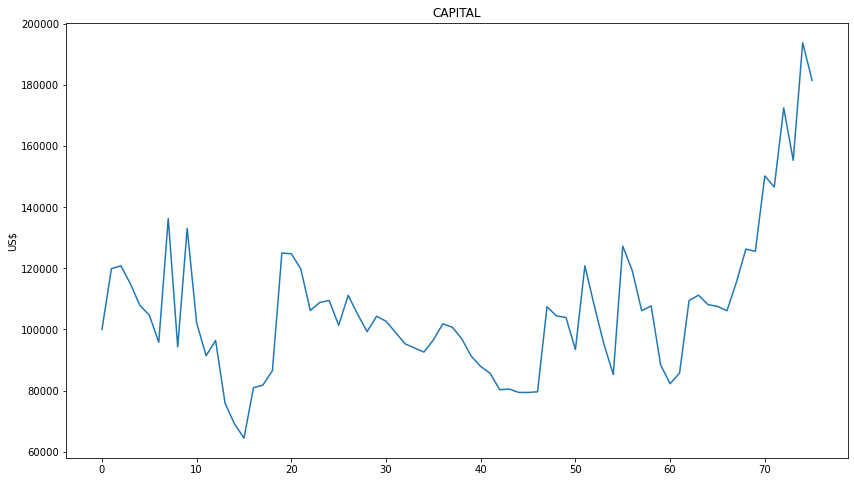

In [28]:
initial_capital = 100000
df_entries['capital'] = initial_capital*df_entries['cum_strat_ret']
capital = [initial_capital]+ list(df_entries['capital'])

plt.figure(figsize=(14,8))
plt.plot(capital)
plt.title('CAPITAL')
plt.ylabel('US$')


## Trading System Metrics

In [29]:
winning_rate = len(df_entries[df_entries['strategy_return']>0])/len(df_entries)
losing_rate = 1 - winning_rate

profit_factor = df_entries

avg_gain = df_entries[df_entries['strategy_return']>0]['strategy_return'].mean()
max_gain = df_entries['strategy_return'].max()

avg_loss = df_entries[df_entries['strategy_return']<=0]['strategy_return'].mean()
max_loss = df_entries['strategy_return'].min()

expectancy = abs((winning_rate*avg_gain)/(losing_rate*avg_loss))

print("winning rate : {0:.2f} %".format(winning_rate*100))
print("Losing rate : {0:.2f} %".format(losing_rate*100))
print("maximum gain : {0:.2f} %".format(max_gain*100))
print("maximum loss : {0:.2f} %".format(max_loss*100))
print("average gain: {0:.2f} %".format(avg_gain*100))
print("average loss: {0:.2f} %".format(avg_loss*100))
print("expectancy: {0:.2f}".format(expectancy))


winning rate : 38.67 %
Losing rate : 61.33 %
maximum gain : 49.28 %
maximum loss : -30.80 %
average gain: 15.29 %
average loss: -6.67 %
expectancy: 1.45
